In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set(style='whitegrid')


In [2]:
# Simulate 'users' dataset
np.random.seed(42)
user_ids = range(1001, 1101)
plans = np.random.choice(['surf', 'ultimate'], size=100, p=[0.7, 0.3])
users = pd.DataFrame({'user_id': user_ids, 'plan': plans})

# Simulate monthly usage
months = list(range(1, 7))
usage_data = []

for user_id, plan in zip(users['user_id'], users['plan']):
    for month in months:
        minutes = np.random.poisson(550 if plan == 'surf' else 1200)
        messages = np.random.poisson(60 if plan == 'surf' else 200)
        gb_used = np.random.normal(18 if plan == 'surf' else 25, 5)
        usage_data.append([user_id, plan, month, max(0, round(minutes)), max(0, round(messages)), max(0, round(gb_used))])

usage = pd.DataFrame(usage_data, columns=['user_id', 'plan', 'month', 'total_minutes', 'total_messages', 'gb_used'])

users.head()



,user_id,plan
0,1001,surf
1,1002,ultimate
2,1003,ultimate
3,1004,surf
4,1005,surf


from matplotlib import pyplot as plt
_df_0['user_id'].plot(kind='hist', bins=20, title='user_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('plan').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['user_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'user_id'}, axis=1)
              .sort_values('user_id', ascending=True))
  xs = counted['user_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('user_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('plan')):
  _plot_series(series, series_name, i)
  fig.legend(title='plan', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('user_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['user_id'].plot(kind='line', figsize=(8, 4), title='user_id')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['plan'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='user_id', y='plan', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [4]:
plan_costs = {
    'surf': {'fee': 20, 'minutes': 500, 'messages': 50, 'gb': 15, 'extra_min': 0.03, 'extra_msg': 0.03, 'extra_gb': 10},
    'ultimate': {'fee': 70, 'minutes': 3000, 'messages': 1000, 'gb': 30, 'extra_min': 0.01, 'extra_msg': 0.01, 'extra_gb': 7}
}

def calculate_revenue(row):
    plan = plan_costs[row['plan']]
    extra_minutes = max(0, row['total_minutes'] - plan['minutes'])
    extra_messages = max(0, row['total_messages'] - plan['messages'])
    extra_gb = max(0, row['gb_used'] - plan['gb'])

    revenue = plan['fee'] + (extra_minutes * plan['extra_min']) + \
              (extra_messages * plan['extra_msg']) + (extra_gb * plan['extra_gb'])
    return revenue

usage['revenue'] = usage.apply(calculate_revenue, axis=1)


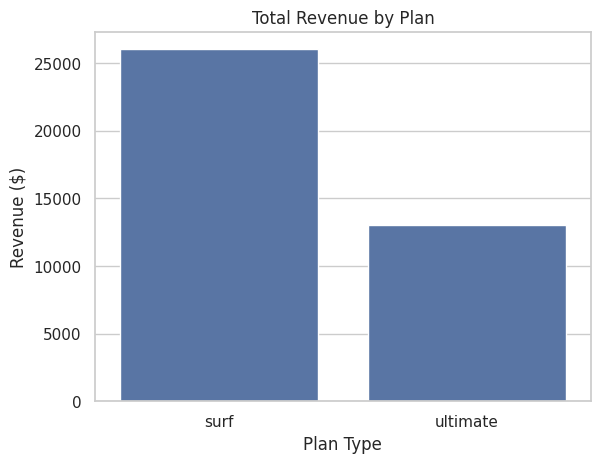

In [5]:
# Total revenue by plan
plan_revenue = usage.groupby('plan')['revenue'].sum().reset_index()

sns.barplot(data=plan_revenue, x='plan', y='revenue')
plt.title('Total Revenue by Plan')
plt.ylabel('Revenue ($)')
plt.xlabel('Plan Type')
plt.show()


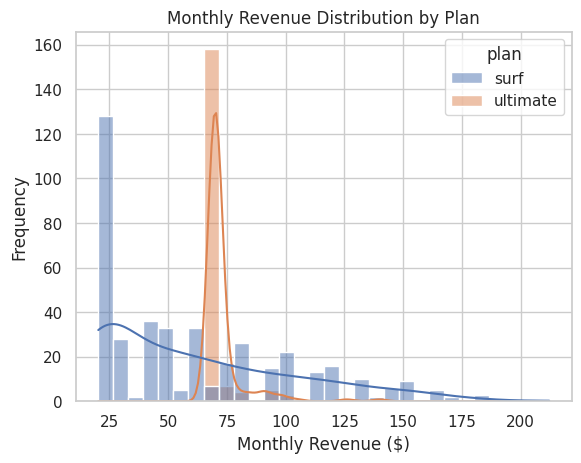

In [6]:
sns.histplot(data=usage, x='revenue', hue='plan', kde=True, bins=30)
plt.title('Monthly Revenue Distribution by Plan')
plt.xlabel('Monthly Revenue ($)')
plt.ylabel('Frequency')
plt.show()


In [7]:
surf_revenue = usage[usage['plan'] == 'surf']['revenue']
ultimate_revenue = usage[usage['plan'] == 'ultimate']['revenue']

t_stat, p_val = stats.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Significant difference in average revenue between Surf and Ultimate.")
else:
    print("⚠️ No significant difference in average revenue between plans.")


T-statistic: -4.95
P-value: 0.0000
✅ Significant difference in average revenue between Surf and Ultimate.


## 📝 Project Summary

- This analysis used simulated customer usage data over 6 months.
- Revenue was calculated based on plan allowances and overage charges.
- Visuals show Ultimate plans generally earn more per user.
- A t-test confirms a statistically significant revenue difference.
- Conclusion: **Ultimate** plan drives more revenue; company may explore promoting upgrades.
